In [51]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# import dataset
df = pd.read_csv("C:\Maryam\ODU\Fall2021\DataVisualisation\HWs\HW4/VDH-COVID-19-PublicUseDataset-Cases-by-Vaccination-Status.csv")

In [60]:
df.head()

,Report Date,Week Ending Date,Health Region,Vaccination Status,Infections,Hospitalizations,Deaths,Population Denominator
0,09/24/2021,04/10/2021,Southwest Region,Partially Vaccinated,94,16,3,1335587
1,09/24/2021,03/13/2021,Southwest Region,Partially Vaccinated,107,11,2,804991
2,09/24/2021,06/19/2021,Southwest Region,Partially Vaccinated,8,1,0,575514
3,09/24/2021,06/12/2021,Central Region,Fully Vaccinated,18,0,0,4235855
4,09/24/2021,04/03/2021,Northwest Region,Unvaccinated,1400,45,15,5508296


In [61]:
# unique dataset
df['Report Date'].unique()

array(['09/24/2021', '10/08/2021'], dtype=object)

In [62]:
data = df[df['Report Date']=='10/08/2021']

In [63]:
data.describe()

,Infections,Hospitalizations,Deaths,Population Denominator
count,555.000000,555.000000,555.000000,5.550000e+02
mean,738.924324,25.464865,8.016216,2.845173e+06
std,1195.826224,40.883520,14.060137,2.120182e+06
min,0.000000,0.000000,0.000000,8.327700e+04
25%,39.000000,3.000000,0.000000,6.992050e+05
50%,201.000000,10.000000,2.000000,2.970151e+06
75%,761.000000,28.000000,8.000000,4.490259e+06
max,6778.000000,273.000000,114.000000,8.005963e+06


In [64]:
#chack to find null data
data.isnull().sum()

Report Date               0
Week Ending Date          0
Health Region             0
Vaccination Status        0
Infections                0
Hospitalizations          0
Deaths                    0
Population Denominator    0
dtype: int64

In [65]:
#data based on weekly date and vaccination status
data_part1 = data.groupby(['Week Ending Date','Vaccination Status']).sum()
data_part1

Infections  Hospitalizations  Deaths  \
Week Ending Date Vaccination Status                                           
01/23/2021       Fully Vaccinated               3                 0       0   
                 Partially Vaccinated        1095                53      62   
                 Unvaccinated               26545               792     364   
01/30/2021       Fully Vaccinated               7                 0       0   
                 Partially Vaccinated         994                65      53   
...                                           ...               ...     ...   
09/25/2021       Partially Vaccinated        1225                29       7   
                 Unvaccinated               16340               383      58   
10/02/2021       Fully Vaccinated            1883                55       3   
                 Partially Vaccinated         976                35       0   
                 Unvaccinated               13488               266      26   

                                       Population Denominator  
Week Ending Date Vaccination Status                            
01/23/2021       Fully Vaccinated                      416385  
                 Partially Vaccinated                 2231395  
                 Unvaccinated                        40029815  
01/30/2021       Fully Vaccinated                      709915  
                 Partially Vaccinated                 3192735  
...                                                       ...  
09/25/2021       Partially Vaccinated                 3167865  
                 Unvaccinated                        14105570  
10/02/2021       Fully Vaccinated                    25600540  
                 Partially Vaccinated                 3149170  
                 Unvaccinated                        13927885  

[111 rows x 4 columns]

In [66]:
#calculating rate of infections for each week and adding that to dataset
data_part1['Rate'] = (data_part1['Infections']/data_part1['Population Denominator'])*100000
data_part1['Rate']

Week Ending Date  Vaccination Status  
01/23/2021        Fully Vaccinated          0.720487
                  Partially Vaccinated     49.072441
                  Unvaccinated             66.313072
01/30/2021        Fully Vaccinated          0.986034
                  Partially Vaccinated     31.133182
                                             ...    
09/25/2021        Partially Vaccinated     38.669577
                  Unvaccinated            115.840764
10/02/2021        Fully Vaccinated          7.355314
                  Partially Vaccinated     30.992293
                  Unvaccinated             96.841696
Name: Rate, Length: 111, dtype: float64

In [67]:
data_part1.head()

Infections  Hospitalizations  Deaths  \
Week Ending Date Vaccination Status                                           
01/23/2021       Fully Vaccinated               3                 0       0   
                 Partially Vaccinated        1095                53      62   
                 Unvaccinated               26545               792     364   
01/30/2021       Fully Vaccinated               7                 0       0   
                 Partially Vaccinated         994                65      53   

                                       Population Denominator       Rate  
Week Ending Date Vaccination Status                                       
01/23/2021       Fully Vaccinated                      416385   0.720487  
                 Partially Vaccinated                 2231395  49.072441  
                 Unvaccinated                        40029815  66.313072  
01/30/2021       Fully Vaccinated                      709915   0.986034  
                 Partially Vaccinated                 3192735  31.133182

In [75]:
main_data = data_part1.unstack()
main_data.head()

Infections                                    \
Vaccination Status Fully Vaccinated Partially Vaccinated Unvaccinated   
Week Ending Date                                                        
01/23/2021                        3                 1095        26545   
01/30/2021                        7                  994        21844   
02/06/2021                        9                 1065        18699   
02/13/2021                       32                  765        15035   
02/20/2021                       39                  559        12323   

                   Hospitalizations                                    \
Vaccination Status Fully Vaccinated Partially Vaccinated Unvaccinated   
Week Ending Date                                                        
01/23/2021                        0                   53          792   
01/30/2021                        0                   65          639   
02/06/2021                        0                   81          590   
02/13/2021                        0                   60          470   
02/20/2021                        3                   53          389   

                             Deaths                                    \
Vaccination Status Fully Vaccinated Partially Vaccinated Unvaccinated   
Week Ending Date                                                        
01/23/2021                        0                   62          364   
01/30/2021                        0                   53          278   
02/06/2021                        0                   39          240   
02/13/2021                        2                   26          169   
02/20/2021                        0                   22          117   

                   Population Denominator                                    \
Vaccination Status       Fully Vaccinated Partially Vaccinated Unvaccinated   
Week Ending Date                                                              
01/23/2021                         416385              2231395     40029815   
01/30/2021                         709915              3192735     38774945   
02/06/2021                        1152535              3585775     37939285   
02/13/2021                        1840065              3496025     37341505   
02/20/2021                        2634920              3239620     36803055   

                               Rate                                    
Vaccination Status Fully Vaccinated Partially Vaccinated Unvaccinated  
Week Ending Date                                                       
01/23/2021                 0.720487            49.072441    66.313072  
01/30/2021                 0.986034            31.133182    56.335347  
02/06/2021                 0.780887            29.700692    49.286643  
02/13/2021                 1.739069            21.881995    40.263508  
02/20/2021                 1.480121            17.255110    33.483633

In [101]:
data_fully = main_data['Rate']['Fully Vaccinated']
data_partially = main_data['Rate']['Partially Vaccinated']
data_unvaccine = main_data['Rate']['Unvaccinated']

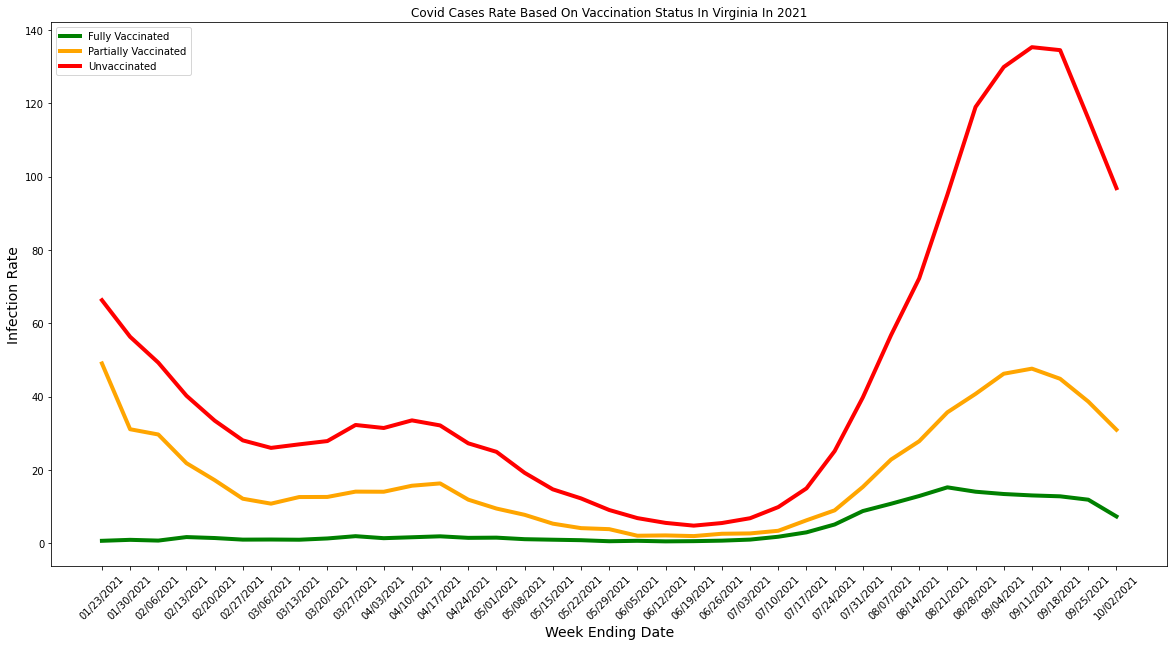

In [118]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot ( data_fully , color = 'green', linewidth=4 , label='Fully Vaccinated' )
plt.plot ( data_partially , color = 'orange', linewidth=4 , label='Partially Vaccinated' )
plt.plot ( data_unvaccine, color = 'red', linewidth=4 , label='Unvaccinated'  )
plt.xlabel('Week Ending Date', fontsize=14, color='black')
plt.ylabel('Infection Rate', fontsize=14, color='black')
plt.title('Covid Cases Rate Based On Vaccination Status In Virginia In 2021')
plt.xticks(rotation = 45)
plt.legend()
plt.show()